# The first part of the assignment, IDS 2021-2022
In this Jupyter notebook, please, document your results and the way you have obtained them. You can use the attached yaml file to build Python environment for this assignment. Another option (and the easiest way) is to just use the _Python environment_ provided at the beginning of the course and then use *pip install* to install *p_decision_tree* library. You can find the required yaml file in the folder of this assignment. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing all datasets and other outputs you have generated (such as pdf, jpg, and others). Please make sure that the datasets and other outputs are easily identifiable, i.e. use names as requested in the corresponding question.

This is the _only_ submission that is required (Jupyter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.


<font color="red"><b>Student Names and IDs:
    
    1. Gonzalo Martin Garcia 377031
    
    2. Cedric Becks 378329
    
    3. Alberto Grimaldi 433017

## Dataset
Almost all of us have the experience of being stuck in an airport because our flight was delayed or canceled. As a person who knows how to analyze data, we all wondered if we could have predicted it if we had access <b>to</b>  the data. This is your chance to find out.

In this assignment, you will perform some analysis on a flight delay dataset. This dataset is provided by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) which tracks the on-time performance of domestic flights operated by large air carriers. In the following, you can find the definition of some of the features in this dataset.

<b>Airline delay.</b> 
This type of delay pertains to the status within the airline’s control. For example, problems with maintenance and crew, cleaning within the cabin, fueling, and baggage loading could all be contributing factors to a delayed flight. 

<b>Security delay.</b> 
Security delay is caused by evacuation of a terminal or concourse, re-boarding of an aircraft because of a security breach, inoperative screening equipment, and/or long lines in excess of 29 minutes at screening areas.

<b>Weather delay.</b> 
Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

<b>Late aircraft delay.</b> 
Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

<b>Taxi in/out.</b> 
Taxi time is the total time of an aircraft's movement on the ground.

<b>Wheels-off.</b> 
The time that an aircraft lifts off from the origin airport.
    
<b>Wheels-on.</b> 
 The time that an aircraft lands at the designated airport.

<b> Air time.</b> 
The time from the moment an aircraft leaves the surface until it comes into contact with the surface at the next point of landing.

## Question 0 - Preprocessing of the Dataset 
 Carry out the following preprocessing steps before starting the analysis:
 - Select 95% of the dataset provided for this assignment by random sampling.
     - Use one of the group member's student numbers as a seed.
     - Rename the newly generated dataset (which contains 95% of the data) to <b>sampled_data</b>.
 - If it is not mentioned otherwise, you should always use <b>sampled_data</b> created in this step as input for the questions.
 
<font color="red">Note: Your assignment would not be graded if this step is not done. </font>

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
flights = pd.read_csv('dataset.csv')
lenght_flights = len(flights)

# Randomly sample 95% of the dataset with seed value as Gonzalo's matriculation number
sampled_data = flights.sample(n=int((0.95*lenght_flights)), random_state= 377031)

## Question 1 - Insights into the Data (20 points):

### Setting of this Question:
We want to make ourselves familiar with the data. To this end, we start with an explorative data analysis. You are more than welcome to provide a deeper analysis and generate more visualizations to understand the data better. Please follow the next two parts.

### Part 1: Basic data analysis
To investigate the data, we take a look at some of the basic statistics and properties of the data.

#### a) Unique values: 
Mention the unique values for cancelation reason in the <b>sampled_data</b>. Also, mention the unique values of this feature where the flights have been canceled and where the flights have not been canceled. Explain the difference.

In [2]:
# Get the unique values for cancelation reason
cancelation_reasons = pd.unique(sampled_data['CANCELLATION_REASON'])

# Get the unique values for cancelation reason, where the flight was cancelled
canceled = pd.unique(sampled_data[sampled_data['CANCELLED'] == 1]['CANCELLATION_REASON'])

# Get the unique values for cancelation reason, where the flight was not cancelled
not_canceled = pd.unique(sampled_data[sampled_data['CANCELLED'] == 0]['CANCELLATION_REASON'])

print("Unique values for cancelation reason:", cancelation_reasons)
print("Unique values for cancelation reason if the flight was canceled:", canceled)
print("Unique values for cancelation reason if the flight was not canceled:", not_canceled)
print("Number of recorded flights: " + str(len(sampled_data['CANCELLED'])))
print("Number of cancelled flights: " + str(len(sampled_data[sampled_data['CANCELLED'] == 1])))
print("Number of non-cancelled flights: " + str(len(sampled_data[sampled_data['CANCELLED'] == 0])))

Unique values for cancelation reason: ['N' 'B' 'C' 'A' 'D']
Unique values for cancelation reason if the flight was canceled: ['B' 'C' 'A' 'D']
Unique values for cancelation reason if the flight was not canceled: ['N']
Number of recorded flights: 893603
Number of cancelled flights: 85319
Number of non-cancelled flights: 808284


    Your answer:
    The cancelation reason feature has unique values "N, A, B, C, and D". To avoid a non assigned cell, if a flight has not been canceled, this feature is always assigned the char 'N'(which can be interpreted as null, or Not canceled). If a flight is canceled, then there are 4 possible reasons for its cancellation represented by the remaining 4 different characters "A, B, C, and D"


#### b) Null values: 
Remove all the rows with null values from the <b>sampled_data</b>. Let's call this new dataset <b>no_null_data</b>. Show the unique values for cancelation reason in <b>no_null_data</b> and compare them to the unique values in <b>sampled_data</b>. Can you explain the difference? 

In [3]:
# Remove all data points which contain null values
no_null_data = sampled_data.dropna()

# Get the unique values for cancelation reason in the filtered dataset 
defined_cancelation_reasons = pd.unique(no_null_data['CANCELLATION_REASON'])

# Get the unique values for cancelation_reason, where the flight was cancelled (filtered dataset)
defined_canceled     = pd.unique(no_null_data[no_null_data['CANCELLED'] == 1]['CANCELLATION_REASON'])

# Get the unique values for cancelation_reason, where the flight was not cancelled (filtered dataset)
defined_not_canceled = pd.unique(no_null_data[no_null_data['CANCELLED'] == 0]['CANCELLATION_REASON'])

print("Unique values for cancelation reason in cleaned up dataset:", defined_cancelation_reasons)
print("Unique values for cancelation reason in cleaned up dataset if the flight was canceled:", defined_canceled)
print("Unique values for cancelation reason in cleaned up dataset if the flight was not canceled:", defined_not_canceled)
print("Number of recorded flights: " + str(len(no_null_data['CANCELLED'])))
print("Number of cancelled flights: " + str(len(no_null_data[no_null_data['CANCELLED'] == 1])))
print("Number of non-cancelled flights: " + str(len(no_null_data[no_null_data['CANCELLED'] == 0])))

Unique values for cancelation reason in cleaned up dataset: ['N']
Unique values for cancelation reason in cleaned up dataset if the flight was canceled: []
Unique values for cancelation reason in cleaned up dataset if the flight was not canceled: ['N']
Number of recorded flights: 808284
Number of cancelled flights: 0
Number of non-cancelled flights: 808284


    Your answer:
    For flights that have been canceled, a lot of features relating to departure, arrival, and different delays are not assigned a value and remain null (since the plane never departed). By dropping all instances with null values, we automatically remove all instances where flights have been canceled. Hence, all flights in the no_null_data set have not been canceled and are given the value 'N' for their cancelation reason. This can be seen in the list defined_cancelation_reasons above.

#### c) Boxplot:
Use <b>no_null_data</b> dataset to create a new dataset including all the flights from airline 'EV' which have at least 2 hours but at most 6 hours of delay. Let's call this data <b>ev_data</b>.

Use a boxplot to create two datasets from <b>ev_data</b> by finding and removing the outliers from the following attributes:
   - Late aircraft delay, call this dataset <b>cleaned_data_late_aircraft</b>,
   - Air system delay, call this dataset <b>cleaned_data_air_system</b>.
    
Note that based on the boxplot, the values greater than the upper-fence and lower than the lower-fence are considered as outliers.

There are a total of 10266 flights with airline EV and arrival delays etween (and including) 2h (120min) and 6h (360min)


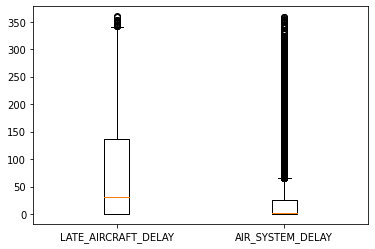

Late aircraft delay upper fence: 340.0
Late aircraft delay lower fence: -204.0
By removing outliers based on the boxplot "LATE_AIRCRAFT_DELAY" we end up with 10248 flights.

Air system delay upper fence: 65.0
Air system delay lower fence: -39.0
By removing outliers based on the boxplot "AIR_SYSTEM_DELAY" we end up with 8576 flights.


In [4]:
import matplotlib.pyplot as plt

# Get all flights with airline EV and arrival delays between (and including) 2h (120min) and 6h (360min). 
# It wasnt clear which delay to use in this exercise, but on moodle we got directed to use the arrival delay
ev_data = no_null_data[ (no_null_data['AIRLINE'] =='EV') 
                         & ((no_null_data['ARRIVAL_DELAY']) >= 120) 
                         & ((no_null_data['ARRIVAL_DELAY']) <= 360)
                      ]

# Draw two boxplots for the delay in late aircraft and air system
box = plt.boxplot([ev_data['LATE_AIRCRAFT_DELAY'], ev_data['AIR_SYSTEM_DELAY']])
plt.xticks( [1, 2],['LATE_AIRCRAFT_DELAY', 'AIR_SYSTEM_DELAY'])
print("There are a total of", len(ev_data), "flights with airline EV and arrival delays etween (and including) 2h (120min) and 6h (360min)")
plt.show()


# Compute upper and lower fence for the boxplot of the late aircraft delay
q1_aircraft = np.quantile(ev_data['LATE_AIRCRAFT_DELAY'], 0.25)
q3_aircraft = np.quantile(ev_data['LATE_AIRCRAFT_DELAY'], 0.75)
iqr_aircraft = q3_aircraft-q1_aircraft
upper_fence_aircraft = q3_aircraft + (1.5*iqr_aircraft)
lower_fence_aircraft = q1_aircraft - (1.5*iqr_aircraft)

# Print resulting fences 
print('Late aircraft delay upper fence:', upper_fence_aircraft)
print('Late aircraft delay lower fence:', lower_fence_aircraft)

# Remove outliers
cleaned_data_late_aircraft = ev_data[(ev_data['LATE_AIRCRAFT_DELAY'] >= lower_fence_aircraft)
                                          & (ev_data['LATE_AIRCRAFT_DELAY'] <= upper_fence_aircraft)]
print('By removing outliers based on the boxplot "LATE_AIRCRAFT_DELAY" we end up with ' + str(len(cleaned_data_late_aircraft)) + ' flights.')
print()


# Compute upper and lower fence for the boxplot of the air system delay
q1_system = np.quantile(ev_data['AIR_SYSTEM_DELAY'], 0.25)
q3_system = np.quantile(ev_data['AIR_SYSTEM_DELAY'], 0.75)
iqr_system = q3_system-q1_system
upper_fence_system = q3_system + (1.5*iqr_system)
lower_fence_system = q1_system - (1.5*iqr_system)

# Print resulting fences 
print('Air system delay upper fence:', upper_fence_system)
print('Air system delay lower fence:', lower_fence_system)

# Remove outliers
cleaned_data_air_system = ev_data[(ev_data['AIR_SYSTEM_DELAY'] >= lower_fence_system)
                                          & (ev_data['AIR_SYSTEM_DELAY'] <= upper_fence_system)]
print('By removing outliers based on the boxplot "AIR_SYSTEM_DELAY" we end up with ' + str(len(cleaned_data_air_system)) + ' flights.')

#### d) Basic statistics: 
Compare basic statistical features of arrival delay (median, mean, and mode, standard deviation, variance) in the <b>ev_data</b>, <b>cleaned_data_late_aircraft</b>, and <b>cleaned_data_air_system</b>. 

Interpret the differences for these statistical values between these three datasets. 

In [5]:
import statistics

# Basic statistical features of arrival delay for the eve_data dataset 
ev_data_median = np.median(ev_data['ARRIVAL_DELAY'])
ev_data_mean = np.mean(ev_data['ARRIVAL_DELAY'])
ev_data_std = np.std(ev_data['ARRIVAL_DELAY'])
ev_data_var = np.var(ev_data['ARRIVAL_DELAY'])
ev_data_mode = statistics.mode(ev_data['ARRIVAL_DELAY'])

print('Median of ev_data dataset:', ev_data_median) 
print('Mean of ev_data dataset:', ev_data_mean) 
print('Mode of ev_data dataset:', ev_data_mode)
print('Standard deviation of ev_data dataset:', ev_data_std) 
print('Variance of ev_data dataset:', ev_data_var) 
print()


# Basic statistical features of arrival delay for cleaned_data_late_aircraft dataset 
cleaned_data_late_aircraft_median = np.median(cleaned_data_late_aircraft['ARRIVAL_DELAY'])
cleaned_data_late_aircraft_mean = np.mean(cleaned_data_late_aircraft['ARRIVAL_DELAY'])
cleaned_data_late_aircraft_std = np.std(cleaned_data_late_aircraft['ARRIVAL_DELAY'])
cleaned_data_late_aircraft_var = np.var(cleaned_data_late_aircraft['ARRIVAL_DELAY'])
cleaned_data_late_aircraft_mode = statistics.mode(cleaned_data_late_aircraft['ARRIVAL_DELAY'])

print('Median of cleaned_data_late_aircraft dataset:', cleaned_data_late_aircraft_median) 
print('Mean of cleaned_data_late_aircraft dataset:', cleaned_data_late_aircraft_mean) 
print('Mode of cleaned_data_late_aircraft dataset:', cleaned_data_late_aircraft_mode)
print('Standard deviation of cleaned_data_late_aircraft dataset:', cleaned_data_late_aircraft_std) 
print('Variance of cleaned_data_late_aircraft dataset:',  cleaned_data_late_aircraft_var)
print()


# Basic statistical features of arrival delay for cleaned_data_air_system dataset 
cleaned_data_air_system_median = np.median(cleaned_data_air_system['ARRIVAL_DELAY'])
cleaned_data_air_system_mean = np.mean(cleaned_data_air_system['ARRIVAL_DELAY'])
cleaned_data_air_system_std = np.std(cleaned_data_air_system['ARRIVAL_DELAY'])
cleaned_data_air_system_var = np.var(cleaned_data_air_system['ARRIVAL_DELAY'])
cleaned_data_air_system_mode = statistics.mode(cleaned_data_air_system['ARRIVAL_DELAY'])

print('Median of cleaned_data_air_system dataset:', cleaned_data_air_system_median) 
print('Mean of cleaned_data_air_system dataset:', cleaned_data_air_system_mean) 
print('Mode of cleaned_data_air_system dataset:', cleaned_data_air_system_mode)
print('Standard deviation of cleaned_data_air_system dataset:',cleaned_data_air_system_std) 
print('Variance of cleaned_data_air_system dataset:', cleaned_data_air_system_var)

Median of ev_data dataset: 165.0
Mean of ev_data dataset: 181.78531073446328
Mode of ev_data dataset: 121.0
Standard deviation of ev_data dataset: 55.01335298727278
Variance of ev_data dataset: 3026.469006902275

Median of cleaned_data_late_aircraft dataset: 165.0
Mean of cleaned_data_late_aircraft dataset: 181.48731459797034
Mode of cleaned_data_late_aircraft dataset: 121.0
Standard deviation of cleaned_data_late_aircraft dataset: 54.599198149901355
Variance of cleaned_data_late_aircraft dataset: 2981.0724386121915

Median of cleaned_data_air_system dataset: 164.0
Mean of cleaned_data_air_system dataset: 181.22901119402985
Mode of cleaned_data_air_system dataset: 121.0
Standard deviation of cleaned_data_air_system dataset: 54.954013405035035
Variance of cleaned_data_air_system dataset: 3019.94358932077


    Your answer:
    There are a total of 10266 flights in the ev_data dataset. Notice that we only removed 18 outliers from eve_data based on the boxplot LATE_AIRCRAFT_DELAY to achieve the data set cleaned_data_late_aircraft. This explains why their basic statistical features are so similar for the arrival delay (Median, Mean, Mode). The difference in variance (of ~45.4), and therefore also in standard deviation (of ~0.4), may be due to the high separation between the removed data points and the boxplot core, which contains the highest density of data points based on the late aircraft delay (see boxplot above). On the other hand, we removed 1690 samples from the ev_data dataset based on the boxplot AIR_SYSTEM_DELAY to obtain the data set cleaned_data_air_system. However, the basic statistical features again basically remain the same, here the variance is closer to the original data set, but the median is off by one point.
    This tells us that even removing points flights from ev_data, the remaining data still represents the statistical general case for a flight from the EV airline and arrival delay of at least 2 hours but at most 6 hours, even though these points are outliers based on a different delay (in this case late aircraft and air system delay). Hence, it follows that these two delays may increase the arrival delay, but do not have a significant and statistically observable effect on it. This is due to both delays generally being small with respect to the arrival delay which by definition is at least 2 hours and at most 6 hours. If one wanted to determine the reason why these flights have such a high arrival delay, it is probably not direclty caused by these two delays.
    When it comes to the values themselves, for the arrival delay, the mean is 3 hours, the median is 2h45min, the standard deviation is 55min and the most common arrival delay is about 2hours. Hence flights with an arrival delay higher than 4hours are uncommon, while most are between 2h and 4hours.
  
  
 

### Part 2: Basic visualization

#### a) Mean visualization: 
Visualize and compare the mean of arrival delay per month in the <b>no_null_data</b>. Just based on this information, if you prefer the minimum delay, which two months would be a good option to book a ticket and which two months are the worst.

       arrival delay
MONTH               
Jan.       56.580031
Feb.       59.154192
March      56.868258
April      56.123261
May        60.650011
June       63.709019
July       59.462602
Aug.       59.719296
Sept.      54.814600
Oct.       55.023930
Nov.       57.407624
Dec.       62.820509


<AxesSubplot:xlabel='MONTH'>

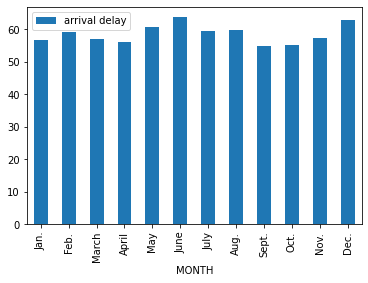

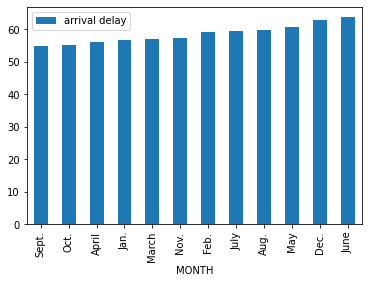

In [6]:
# We group by month and compute the mean for arrival delay. Further are some renaming operations to make the plot clearer
mean_a_delays = no_null_data\
    .groupby(by='MONTH', as_index=True)\
        .mean()["ARRIVAL_DELAY"]\
            .rename(index={1:"Jan.", 2:"Feb.", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"Aug.", 9:"Sept.", 10:"Oct.", 11:"Nov.", 12:"Dec.", })\
                .to_frame()\
                    .rename(columns={"ARRIVAL_DELAY":"arrival delay"})

# The values without plot
print(mean_a_delays)

# Standard bar plot
mean_a_delays.plot.bar()

# Bar plot ordered by magnitude, to visualize the highest months easier
mean_a_delays.sort_values("arrival delay").plot.bar()

    Your answer:
    Based on this information, the months September and October have the least arrival delay and are therefore the best option to book a ticket. Conversely, December and June are the worst.

#### b) Mean visualization:
Visualize and compare the mean of weather delay per month in the <b>no_null_data</b>. Which month has the minimum and which month has the maximum average weatherdelay? 

       weather delay
MONTH               
Jan.        2.731733
Feb.        4.295481
March       2.432666
April       2.725874
May         3.723068
June        3.308783
July        2.158861
Aug.        2.791741
Sept.       2.312413
Oct.        1.788428
Nov.        2.640589
Dec.        3.382298


<AxesSubplot:xlabel='MONTH'>

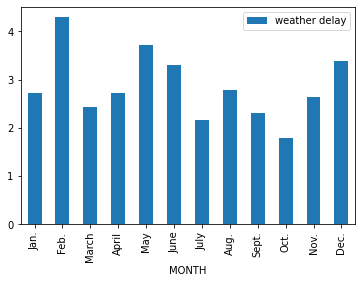

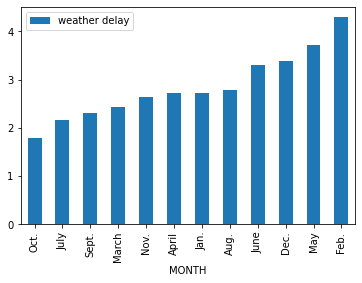

In [7]:
# We group by month and calculate the mean for weather delay. Further are some renaming operations to make the plot clearer
mean_w_delays = no_null_data\
    .groupby(by='MONTH', as_index=True)\
        .mean()["WEATHER_DELAY"]\
            .rename(index={1:"Jan.", 2:"Feb.", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"Aug.", 9:"Sept.", 10:"Oct.", 11:"Nov.", 12:"Dec.", })\
                .to_frame()\
                    .rename(columns={"WEATHER_DELAY":"weather delay"})
                    
# The values without plot
print(mean_w_delays)

# Standard bar plot
mean_w_delays.plot.bar()

# Bar plot ordered by magnitude, to visualize the highest months easier
mean_w_delays.sort_values("weather delay").plot.bar()

    Your answer:
    The minimum average weatherdelay is in October and the maximum average weatherdelay is in February.

#### c) Interpretation:
Based on the visualization of the two previous tasks, can you detect any possible relationship between the arrival delay and weather delay per month? If yes, please explain.

<AxesSubplot:xlabel='MONTH'>

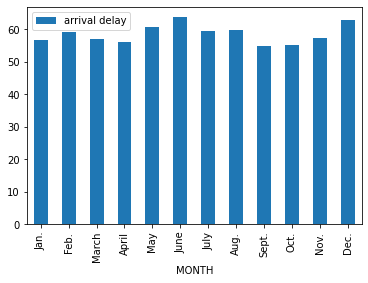

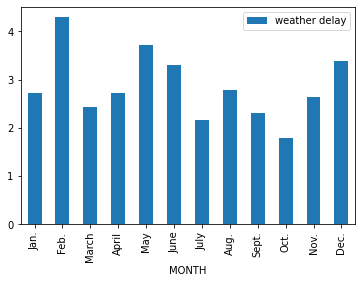

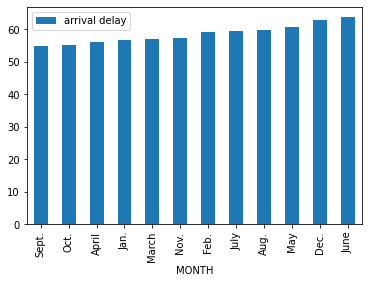

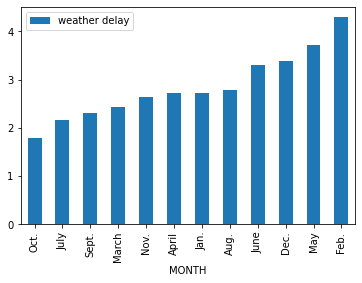

In [8]:
# We plot again the same graphs from above, for easier comparision 
mean_a_delays.plot.bar()
mean_w_delays.plot.bar()
mean_a_delays.sort_values("arrival delay").plot.bar()
mean_w_delays.sort_values("weather delay").plot.bar()

    Your answer:
    Both charts for mean arrival delay and mean weather delay have similar form and behavior, wherein the case of weather delay it is much more pronounced. While the (relative) differences in weather delay are more extreme, they are more muted in arrival delay. Both have a peak around May/June, with a decrease in delay afterward and an increase during winter until February, with January showing a slight dip in delays in both cases again, where it suddenly drops (harshly in case of weather delay, and more gradual over the course of two months for arrival delay). And again, during spring the mean delays increases, until they peak around May/June.
    Moreover, the by delay sorted bar plots, up to some outliers, are very similar too. Most months are fairly close (like October being the least/second to least in weather/arrival delay), and only a few are much further apart (like February, being the most affected by weather delay, but only middle of the road for arrival delay). The months close to each other are March, May, August, September, October, November, and December. That is seven out of twelve months, which is higher than one would expect by chance. Only February and July are truly far apart, with January, April, and June being somewhere in between.

#### d) Mean visualization: 
Now visualize the mean of arrival delay per day of the week (per 7 week days) in each month. Based on this information, which combination of days of week and months should be avoided to decrease the possibility of the arrival delay the most? Provide 5 combinations of days of week and months.

<AxesSubplot:>

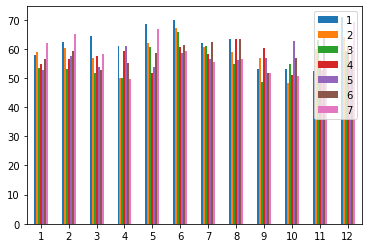

In [9]:
# Grouping by two labels (we expect a total of 7x12 = 84 rows) and computing the mean for arrival delay
mean_paired_delays = no_null_data\
    .groupby(by=['MONTH', 'DAY_OF_WEEK'], as_index=True)\
        .mean()['ARRIVAL_DELAY']

# We first reorganize the data into a dataframe so that pandas can display them as a grouped bar plot
mean_paired_delays_frame = pd.DataFrame({i:mean_paired_delays[:,i] for i in range(1,8)}, index=[1,2,3,4,5,6,7,8,9,10,11,12])
mean_paired_delays_frame.plot.bar(rot=0)


    Your answer:
    From the bar plot, five high spikes in the arrival delay given by a combination of a day of the week and month are: Mondays in December, Sundays in December, Mondays in June, Tuesdays in June, and Mondays in May.


#### e) Distribution:
 In <b>no_null_data</b>, plot the distribution of weather delay for those flights with at least 3 hours of weather delay.

<AxesSubplot:ylabel='Density'>

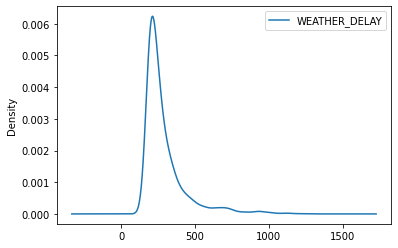

In [10]:
# We first filter out the unwanted data and then plot the probabilitsic distribution based on our data
no_null_data[no_null_data["WEATHER_DELAY"] >= 180]["WEATHER_DELAY"].to_frame().plot.density()

#### f) Monthly distribution:
Plot the monthly distribution of weather delay in one figure where weather delay is more than 3 hours in <b>no_null_data</b>.

<AxesSubplot:xlabel='MONTH', ylabel='WEATHER_DELAY'>

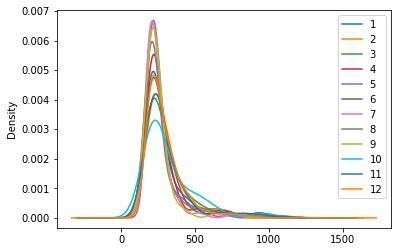

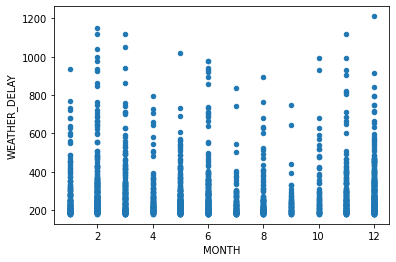

In [11]:
# We first filter out the unwanted data and then plot the probabilitsic distribution for every month
no_null_data[no_null_data["WEATHER_DELAY"] >= 180].groupby("MONTH")["WEATHER_DELAY"].plot(kind='density', legend=True)

# Since the distribution for the different months are a bit hard to make out, 
# we also included a scatter plot to give us an inkling about what the distribution may look like
no_null_data[no_null_data["WEATHER_DELAY"] >= 180].plot.scatter("MONTH", "WEATHER_DELAY")

#### g) Joint distribution:
Explore the distribution of weather delay and arrival delay together in the <b>no_null_data</b> for airlines 'EV' and 'VX', considering only the flights that the arrival delay is more than 6 hours. Can you find any similarities or differences among them? Please explain.

<AxesSubplot:xlabel='WEATHER_DELAY', ylabel='ARRIVAL_DELAY'>

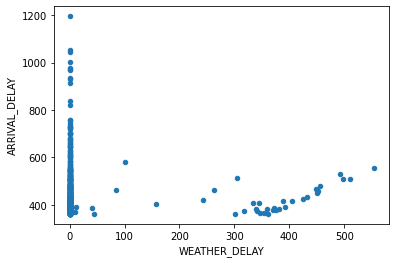

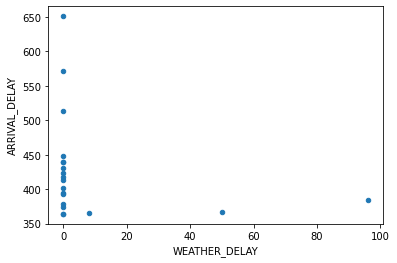

In [12]:
# We create the two data subsets hat we want to examine
ev_joint_data = no_null_data[(no_null_data["ARRIVAL_DELAY"]>360) & (no_null_data["AIRLINE"] == "EV")]
vx_joint_data = no_null_data[(no_null_data["ARRIVAL_DELAY"]>360) & (no_null_data["AIRLINE"] == "VX")]

# We plot the data using pandas scatter plot.
ev_joint_data.plot.scatter("WEATHER_DELAY", "ARRIVAL_DELAY")
vx_joint_data.plot.scatter("WEATHER_DELAY", "ARRIVAL_DELAY")

    Your answer:
    For the airlines EV and VX, the most common delay of the two is the arrival delay. Relative to all instances weather delay seems to be a rare occurrence. However, given a weather delay, an arrival delay is almost always present (This makes sense intuitively since a weather delay most likely will cause an arrival delay). The converse is not true. For the airline VX weather delay only appeared in 3 cases, none of which are as high as their arrival delay. On the other hand, for the airline EV, weather delays are more abundant and in some cases even outstrips their arrival delay.
    Comparing the two airlines, EV has higher and more arrival delays (by an average factor of approx. 2), and higher weather delays (by an average factor of approx. 3).

## Question 2 - Decision Trees (10 points):

### Setting of this Question:
We want to buy a ticket from 'UA' airline. As we are not a big fan of flights that have a long delay, we have decided to use a decision tree to find the best time to buy the ticket. Our plan is to use a decision tree to predict the arrival delay. But first, we need to preprocess the data. Please do the following tasks.  

#### a) Data preprocessing: 
Use <b>no_null_data</b> for this task and filter it such that the resulting dataset contains only the flights from 'UA' airline that has some (non zero) arrival delay. 

First, discretizing the arrival delay as follows:
 - if the delay is at most 45 minutes, the value of the new attribute should be 'acceptable_delay',
 - else, the value of the new attribute should be 'unacceptable_delay',
 
Let's call this new categorical feature 'DELAY'.

Second, discretize the distance into two equal-width bins and name them 'short' and 'long'. Let's call this new feature 'DISTANCE_CATEGORY'.

In [13]:
# We first select the subset of data that interests us
ua_data = no_null_data[(no_null_data["AIRLINE"] == "UA") & (no_null_data["ARRIVAL_DELAY"] > 0)]

# We use panda to automatically discretize distance
ua_data.loc[:,"DISTANCE_CATEGORY"] = pd.qcut(ua_data["DISTANCE"], q=2, labels=["short", "long"])

# We add the categorical feature delay. We do this last so p_decision_tree has an easier time
ua_data.loc[:,"DELAY"] = ["acceptable_delay" if x<=45 else "unacceptable_delay" for x in ua_data["ARRIVAL_DELAY"]]

# Resulting dataset
ua_data

C:\Users\gonza\anaconda3\envs\env-IDS2021\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Unnamed: 0,Unnamed: 0.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,...,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DAY_YEARLY,WEEK,SCHEDULED_DEPARTURE_CATEGORY,DISTANCE_CATEGORY,DELAY
372175,372175,187621,2015,3,25,3,UA,479,N440UA,SFO,...,16.0,0.0,0.0,0.0,0.0,84,12,Morning,short,acceptable_delay
562226,562226,761923,2015,8,16,7,UA,477,N446UA,SFO,...,0.0,0.0,8.0,17.0,0.0,228,32,Evening,long,acceptable_delay
617541,617541,469603,2015,3,22,7,UA,1190,N75435,ORD,...,0.0,0.0,2.0,77.0,0.0,81,11,Evening,short,unacceptable_delay
100249,100249,843717,2015,1,30,5,UA,1193,N36207,SFO,...,0.0,0.0,0.0,50.0,0.0,30,4,Evening,short,unacceptable_delay
297576,297576,228866,2015,4,3,5,UA,285,N821UA,IAH,...,0.0,0.0,8.0,21.0,0.0,93,13,Afternoon,long,acceptable_delay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835376,835376,862734,2015,10,1,4,UA,786,N470UA,SMF,...,22.0,0.0,0.0,0.0,0.0,274,39,Morning,long,acceptable_delay
924144,924144,606610,2015,3,7,6,UA,1489,N36476,DEN,...,0.0,0.0,19.0,0.0,0.0,66,9,Morning,short,acceptable_delay
319244,319244,688083,2015,4,19,7,UA,1531,N68817,EWR,...,0.0,0.0,31.0,65.0,0.0,109,15,Night,long,unacceptable_delay
809095,809095,135751,2015,6,26,5,UA,756,N438UA,DEN,...,0.0,0.0,4.0,51.0,0.0,177,25,Morning,short,unacceptable_delay


#### b) Decision tree:
Consider the extended dataset from the previous task (task a). Use 'SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', and 'DAY_OF_WEEK' as descriptive features. Generate a decision tree in which the minimum number of samples for splitting is 1000.

Note: for this task, you must use p_decision_tree library. You can use the attached yaml file to build Python environment for this task. The easiest way is to just use *pip install*.

In [14]:
# p_decision_tree installer
import pip
pip.main(['install', 'p_decision_tree'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [15]:
from p_decision_tree.DecisionTree import DecisionTree

# Our features and label
descriptive_features = ["SCHEDULED_DEPARTURE_CATEGORY", "DISTANCE_CATEGORY", "DAY_OF_WEEK"]
label = ["DELAY"]

# Reduce the size of the table (this makes it a bit easier to get p_decision_tree to work)
data = ua_data.drop(ua_data.columns.difference(descriptive_features + label), axis=1)


# p_decision_tree:
columns = data.columns

# All columns except the last one are descriptive by default
descriptive_features = columns[:-1]

# The last column is considered as label
label = columns[-1]

# Converting all the columns to string
for column in columns:
    data[column]= data[column].astype(str)

data_descriptive = data[descriptive_features].values
data_label = data[label].values

# Build Decision Tree
decisionTree = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "entropy")

# Pruning features based on gain_threshold and minimum_samples
decisionTree.id3(0,1000)

# Visualizing the decision tree with Graphviz
dot = decisionTree.print_visualTree( render=True )

You either have not installed the 'dot' to visualize the decision tree or the reulted .pdf file is open!


#### c) ID3 feature selection:
In the generated decision tree, what is the best feature (based on entropy) for splitting the tree in the second round of ID3 considering the value of the feature chosen in the first round of ID3?       


    Your answer:
    In the first round, the feature with the highest information gain is SCHEDULED_DEPARTURE_CATEGORY, i.e. ID3 defines it as the root node of the tree and splits it based on its 4 possible instances (Morning, Evening, Afternoon, and Night). Considering the value of the feature chosen in the first round, for the second round ID3 chooses the feature DAY_OF_WEEK to split since it now has the highest information gain. 
    As a result, we can see that for the subtree given by the value "Night" from SCHEDULED_DEPARTURE_CATEGORY (which is pruned), DAY_OF_WEEK already predicts the target feature with value acceptable delay. Note that this high information gain is also reflected on the subtree given by SCHEDULED_DEPARTURE_CATEGORY= "Morning", where ultimately the output of the subtree is always acceptable delay. Hence, the best time to buy a ticket from 'UA' airline is at night or in the morning, since the delay of all flights is acceptable for any day of the week (after pruning).
    
    

#### d) Rule interpretation:
Based on the discovered decision tree, which conditions are more prone to more than 45 minutes delay. Explain two rules.

    Your answer:
Note that we only have a total of seven leaves with unacceptable delay. Moreover, we have already explained that the DT predicts acceptable delays for all 'UA' flights at night and in the morning. Hence, the following two rules will be based on the time frame SCHEDULED_DEPARTURE_CATEGORY = Afternoon or SCHEDULED_DEPARTURE_CATEGORY=Evening. 
Rules:
1. If you take a flight on Tuesday evenings, your delay is prone to be unaccaptable, no matter if its long or short.
2. For afternoons and evenings, short flights on Monday are prone to deliver unacceptable delays.

## Question 3 - Classification Models and Prediction (50 Points):

### Background of this Question:
You heard from a friend that you are entitled to receive a payment of at least 150€ if your flight is delayed by more than 3 hours. Very excited, you are reminded of your IDS course and the flight dataset you had to analyze back then. You start to imagine a model trained on these flights that can predict if your future flights are delayed by three hours and, basically, allow you to travel the world for free if it chooses these flights correctly. You remember your IDS lecture and what you have to do to make your dream come true: You want to prepare the data accordingly, i.e., you model the target variable of being delayed by more than 3 hours and you choose and model the descriptive variable that you want to use for predicting delay. For the evaluation of your models, you have to choose an evaluation metric that describes whether the flights chosen by your model are actually delayed by <b> at least </b> 3 hours. Moreover, for the models, you want to train different regression, SVM, and neural network models with different parameters and find the best one. In the end, you should calculate for which flight price your model lets you travel the world for free.
### Parts of this question:
We want you to systematically approach the questions. So we take the following steps (parts): preparing the data, what is the target variable, what are your descriptive variables, what is the evaluation measure you are trying to maximize, and what is the baseline you should at least be better than?

### Part 0: Preparing the dataset

Load the classification dataset; i.e., <b>flights_classifying.csv</b>.

In [1]:
import pandas as pd
import numpy as np

# Load data set
flights_data = pd.read_csv("flights_classifying.csv")

Randomly order the data points using one of the group member's students as the random state.

In [2]:
# We sample 100% of the dataset, which also shuffels it based on the matriculation number of Cedric Becks
shuffeled_flight_data = flights_data.sample(len(flights_data), random_state=378329)

### Part 1: Designing your variables and evaluation

#### a) Target feature:
Design your target feature such that you can predict whether a flight is delayed by more than 3 hours or not and add it to the dataset. Drop all data points that contain a canceled flight.

In [3]:
# We drop all cancelled flights
delayed_flight_data = shuffeled_flight_data[shuffeled_flight_data["CANCELLED"] == 0]

# Define our target variable
delayed_flight_data.loc[:,["DELAY_PAYMENT"]] = np.where(delayed_flight_data["ARRIVAL_DELAY"] <= 180, 0, 1)

/home/hydrabogen/.local/share/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


#### b) Descriptive features:
Please select your descriptive features and motivate your choice. Always consider the setting and whether choosing these features makes sense concerning the setting of the question. Apply the necessary transformations.

In [4]:
# The possible features for the Classification Models are: 
# [
#       'YEAR', 'MONTH', 'DAY','DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 
#       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
#       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
#       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
#       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
#       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
#       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
#       'WEATHER_DELAY', 'DAY_YEARLY', 'WEEK', 'SCHEDULED_DEPARTURE_CATEGORY',
#       'REIMBURSMENT'
# ]
#
# Immediately, we can ignore FLIGHT_NUMBER, TAIL_NUMBER, TAXI_OUT, TAXI_IN, CANCELLED, CANCELLATION_REASON,
# since they are unique identifiers, or irrelevant to the task.
#
# Similarly, we can drop every feature that is only available once the flight has departed or landed. 
# These values can not be known while booking the flight. With this, we refer to features: 
#           WHEELS_OFF, DEPARTURE_TIME, ELAPSED_TIME, AIR_TIME, WHEELS_ON, ARRIVAL_TIME, 
#           ARRIVAL_DELAY, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, WEATHER_DELAY and REIMBURSEMENT.
#
# The feature 'LATE_AIRCRAFT_DELAY' is of questionable validity. You could potentially book a last-minute flight,
# if you already know that the plane is delayed. However, planning a last-minute vacation is hard 
# and the data for late aircraft delay may not be easily available to a layperson, so we will not include it either.
# Similar arguments can be made for DIVERTED.
#
# The feature 'YEAR' is always the same, being 2015, so we don't gain anything from including it.
#
# That leaves us with features ['MONTH', 'DAY', 'DAY_OF_WEEK', 'DAY_YEARLY', 'WEEK', 
#                       'DISTANCE', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'SCHEDULED_ARRIVAL', 
#                       'SCHEDULED_DEPARTURE_CATEGORY', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
#
# Out of these, the features 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT' are nominal, which makes
# transformation necessary (see below). 
#
# The feature 'SCHEDULED_DEPARTURE_CATEGORY' is ordinal however, since it essentially represents a time
#(Roughly 0:00,6:00,12:00,18:00) and it can be transformed a lot easier (though it is debatable, whether
#this actually gains us anything since we already have more precise timestamps with the scheduled departure).

# Get descriptive features
descriptive_features =  ['MONTH', 'DAY', 'DAY_OF_WEEK', 'DAY_YEARLY', 'WEEK',  'DISTANCE', 'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'SCHEDULED_ARRIVAL', 
                            'SCHEDULED_DEPARTURE_CATEGORY', 
                            'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'AIRLINE'
                        ]
columns = descriptive_features + ["DELAY_PAYMENT"]

# Numerical representation for SCHEDULED_DEPARTURE_CATEGORY as described above
reduced_flight_data = delayed_flight_data.drop(delayed_flight_data.columns.difference(columns), axis=1)
reduced_flight_data["SCHEDULED_DEPARTURE_CATEGORY"] = [0 if x == "Night" else 6 if x == "Morning" else 12 if x == "Afternoon" else 18 for x in reduced_flight_data["SCHEDULED_DEPARTURE_CATEGORY"]]


########################################################################
#                 Preprocessing of Nominal Data                        #
########################################################################

########################
# Own Integer Encoding #
########################
#This encoding was first used for the neural network since the data would remain 14-dimensional (instead of an increase 
#to 660 dimensions for the hot encoding). However, it became problematic in the learning process, so we then switched to 
#the hot encoding below.

# get all possible Airports and Airlines 
#airports = list(set().union(pd.unique(reduced_flight_data['ORIGIN_AIRPORT']),pd.unique(reduced_flight_data['DESTINATION_AIRPORT'])))
#airlines = pd.unique(reduced_flight_data['AIRLINE'])

# defie dictionaries of airports and airlines used as integer encoding
#airport_dict = dict([(airports[i], i) for i in range(len(airports))])
#airline_dict = dict([(airlines[i], i) for i in range(len(airlines))])

# Apply dictaionaries as encodings of the noiminal data
#list_oa = list(reduced_flight_data["ORIGIN_AIRPORT"])
#list_da = list(reduced_flight_data["DESTINATION_AIRPORT"])
#list_a  = list(reduced_flight_data["AIRLINE"])
#reduced_flight_data.loc[:, ["ORIGIN_AIRPORT"]] = [airport_dict.get(i) for i in list_oa]
#reduced_flight_data.loc[:, ["DESTINATION_AIRPORT"]] = [airport_dict.get(i) for i in list_da]
#reduced_flight_data.loc[:, ["AIRLINE"]]= [airline_dict.get(i) for i in list_a]


####################
# Own Hot Encoding #
####################
#Hot encoding also become problematic for the learning process of the neural network, so we switched to an 
#label encoder from sk learn.

# get all possible Airports and Airlines 
#airports = pd.unique(list(set().union(pd.unique(reduced_flight_data['ORIGIN_AIRPORT']),pd.unique(reduced_flight_data['DESTINATION_AIRPORT']))))
#airlines = pd.unique(reduced_flight_data['AIRLINE'])

# copy the needed columns for iteration
#list_oa = list(reduced_flight_data["ORIGIN_AIRPORT"])
#list_da = list(reduced_flight_data["DESTINATION_AIRPORT"])
#list_a  = list(reduced_flight_data["AIRLINE"])

#Drop nominal data
#reduced_flight_data.drop("ORIGIN_AIRPORT",axis=1, inplace=True)
#reduced_flight_data.drop("DESTINATION_AIRPORT",axis=1, inplace=True)
#reduced_flight_data.drop("AIRLINE",axis=1, inplace=True)

#Hot Encoding:
#for airport in airports:
    #reduced_flight_data["ORIGIN_AIRPORT_"+str(airport)] =  [1 if (i==airport) else 0 for i in list_oa]
    #reduced_flight_data["DESTINATION_AIRPORT_"+str(airport)] =  [1 if (i==airport) else 0 for i in list_da]
    
#for airline in airlines:
    #reduced_flight_data["AIRLINE_"+str(airline)] =  [1 if (i==airline) else 0 for i in list_a]


################################
# Label Encoding from sk learn #
################################
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
reduced_flight_data['ORIGIN_AIRPORT'] = le.fit_transform(reduced_flight_data['ORIGIN_AIRPORT'])
reduced_flight_data['DESTINATION_AIRPORT'] = le.fit_transform(reduced_flight_data['DESTINATION_AIRPORT'])
reduced_flight_data['AIRLINE'] = le.fit_transform(reduced_flight_data['AIRLINE'])

Split your data into training and testing data, with 85% of the dataset going to testing data.

In [5]:
# Simply count how many instances need to be in our training set to reach 85% and put the rest into the testing set.
cuttoff_point = int(len(reduced_flight_data) * 0.85)
training_flight_data = reduced_flight_data.iloc[:cuttoff_point, :]
testing_flight_data = reduced_flight_data.iloc[cuttoff_point:, :]

# Separation of feature and target values for trainig and test dataset
X_testing= testing_flight_data.loc[:, testing_flight_data.columns != 'DELAY_PAYMENT']
y_testing= testing_flight_data['DELAY_PAYMENT']
X_training= training_flight_data.loc[:, training_flight_data.columns != 'DELAY_PAYMENT']
y_training= training_flight_data['DELAY_PAYMENT']        

#### c) Evaluation metric
Discuss and choose an evaluation metric that you can evaluate your predictions against. Hint: Be aware of the setting of this questions, i.e., what your goal is.

In [18]:
# These are the evaluation functions we are using. We focus on the F-measure, 
# which is given by the weighted harmonic mean of recall and precision.
# The most common F-measure is the F1 measure which is computed by the function evaluationMetric.
# Additionally, we have functions to compute the precision, recall, and accuracy separately.
from sklearn.metrics import confusion_matrix

# F1 measure
def evaluationMetric(prediction, label):
    return f_measure(prediction, label, 1)

# Fbeta-Measure
def f_measure(prediction, label, beta=1):
    prec = Precision(prediction, label)
    recall = Recall(prediction, label)
    #handeling division by zero 
    if(recall + prec == 0):
        return 0
    return (1+beta**2)*((recall*prec)/(recall+((beta**2)*prec)))

# Recall of the model
def Recall(prediction, label):
    con_m = confusion_matrix(prediction, label)
    tp = con_m[1][1]
    tn = con_m[0][0]
    fp = con_m[1][0]
    fn = con_m[0][1]
    #handeling division by zero 
    if(tp+fn == 0):
        return 0
    return tp/(tp+fn)
    
# Precsion of the model
def Precision(prediction, label):
    con_m = confusion_matrix(prediction, label)
    tp = con_m[1][1]
    tn = con_m[0][0]
    fp = con_m[1][0]
    fn = con_m[0][1]
    #handeling division by zero 
    if(tp+fp == 0):
        return 0
    return tp/(tp+fp)

# Accuracy function
def Accuracy(prediction, label):
    con_m = confusion_matrix(prediction, label)
    diagonal = con_m.trace()
    sum_ = con_m.sum()
    return diagonal / sum_

# Evaluation output for given model, input and desired output
def evaluation_verbose(predictor, features, label):
    d = predictor.predict(features)
    print('Accuracy on data: ',Accuracy(d,label))
    print('Precision on data: ',Precision(d,label))
    print('Recall on data: ',Recall(d,label))
    print('F1-measure on data: ', evaluationMetric(d,label))
    print()

    Your answer:
    The model is trying to predict if a given flight is going to be delayed by more than 3 hours. Since the event of such an arrival delay is very unlikely, a model that always returns 0 (outputs no delay,) will have high accuracy (approx. 92% due to approx. 92% of all flights (testing and training) not having such a delay). Hence, using a simple evaluation metric like accuracy does not really quantify the performance or usefulness of the model. To combat this, we make use of precision and recall to compute the f1 measure which punishes false positives and negatives equally. 
    Since we lose money by buying flights that do not get delayed, precision is more important than the recall of the model. A model may underestimate the number of delayed flights (low recall), but still be viable if its precision is high enough. In this sense, we can be more sure that if a delay is predicted we most likely will earn money.
    On the other hand, we also want the model to predict a meaningful number of delays, instead of one who for example only predicts 10 out of 10000 delayed flights. For this reason, we consider the F1 measure instead of just analysing pure precision, to compare the performance and range of different models.

#### d) Evaluation baseline
Calculate the baseline of the evaluation metric, i.e., a value you can achieve without any model by basic data analysis.

In [19]:
def baseline_random():
    np.random.seed(seed=378329)
    predictions = np.random.randint(2,size=len(testing_flight_data))  
    print('Accuracy on data: ',Accuracy(predictions,testing_flight_data["DELAY_PAYMENT"]))
    print('Precision on data: ',Precision(predictions,testing_flight_data["DELAY_PAYMENT"]))
    print('Recall on data: ',Recall(predictions,testing_flight_data["DELAY_PAYMENT"]))
    print('F1-measure on data: ', evaluationMetric(predictions,testing_flight_data["DELAY_PAYMENT"]))
    print()

def baseline_alltrue():
    predictions = np.ones(len(testing_flight_data))  
    print('Accuracy on data: ',Accuracy(predictions,testing_flight_data["DELAY_PAYMENT"]))
    print('Precision on data: ',Precision(predictions,testing_flight_data["DELAY_PAYMENT"]))
    print('Recall on data: ',Recall(predictions,testing_flight_data["DELAY_PAYMENT"]))
    print('F1-measure on data: ', evaluationMetric(predictions,testing_flight_data["DELAY_PAYMENT"]))
    print()

def baseline_allfalse():
    predictions = np.zeros(len(testing_flight_data))  
    print('Accuracy on data: ',Accuracy(predictions,testing_flight_data["DELAY_PAYMENT"]))
    print('Precision on data: ',Precision(predictions,testing_flight_data["DELAY_PAYMENT"]))
    print('Recall on data: ',Recall(predictions,testing_flight_data["DELAY_PAYMENT"]))
    print('F1-measure on data: ', evaluationMetric(predictions,testing_flight_data["DELAY_PAYMENT"]))
    print()
    
print('Random Guessing:')
baseline_random()
print('Always Guessing a Delay:')
baseline_alltrue()
print('Always Guessing No Delay:')
baseline_allfalse()

Random Guessing:
Accuracy on data:  0.5019787412161648
Precision on data:  0.0729402200147354
Recall on data:  0.508681785967399
F1-measure on data:  0.12758582379735584

Always Guessing a Delay:
Accuracy on data:  0.07158984246175702
Precision on data:  0.07158984246175702
Recall on data:  1.0
F1-measure on data:  0.1336142610260174

Always Guessing No Delay:
Accuracy on data:  0.928410157538243
Precision on data:  0
Recall on data:  0.0
F1-measure on data:  0



    Your answer:
    We define 3 evaluation baselines. A model that randomly guesses a delay with probability 0,5, one that always predicts a delay, and one that always predicts no delay.
    For the model that always returns 0 (no delay), even if it has maximal accuracy, it is useless in our setting, since we want to make money out of predicting delays. Therefore, it has a precision of 0 and hence also an F-measure of 0.
    For the model that always returns 1 (delay), it appears to have a non-zero F1 measure, but it is also useless in our setting because we would buy every flight. As mentioned previously, the prior probability of a flight having such a delay is approx. p(y=1)~0,08. Hence, we would lose a lot of money in the long run even for very cheap flight tickets. 
    By random guessing a delay with probability r=0,5, we get an F1 measure of 2rp(y=1)/(r+p(y=1))~0,13. This will be our baseline for the coming models. Any model we train has to be better than random chance to be worth following. 

### Part 2: Model Selection

For each of the classifiers: regression, SVM and neural network, train a model. For each of these models, select and fine-tune the parameters such that the result w.r.t. your evaluation metric is as good as possible. You have to k-fold cross-validate (reasonable choice of k) your training and you have to test your predictions on the test dataset.

Hint: There might be some problems with class imbalance when you fit your models.


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
sc = StandardScaler()

#### a) Regression:
Train, finetune and evaluate a regression model.

In [13]:
from sklearn.linear_model import LogisticRegression

logistic_param_grid = {'C': [0.11], 'solver': ['sag']}

# We save our chosen functions. The non-linear functions [sin(x), sigmoid(x), sqrt(x), x⁻¹, x⁵, x⁶, x⁷] did not make the cut.
train_list = [X_training]
test_list = [X_testing]

# Function: [f(x) = x²]
train_list.append(X_training.apply(lambda a : a**2).add_suffix("_SQUARED"))
test_list.append(X_testing.apply(lambda a : a**2).add_suffix("_SQUARED"))

# Function: [f(x) = x³]
train_list.append(X_training.apply(lambda a : a**3).add_suffix("_CUBED"))
test_list.append(X_testing.apply(lambda a : a**3).add_suffix("_CUBED"))

# Function: [f(x) = x⁴]
train_list.append(X_training.apply(lambda a : a**4).add_suffix("_FOUR"))
test_list.append(X_testing.apply(lambda a : a**4).add_suffix("_FOUR"))

# We join all our Dataframes together
X_conjoined_training = pd.concat(train_list, axis=1)
X_conjoined_testing = pd.concat(test_list, axis=1)

logistic_r = LogisticRegression(penalty="l2",                 # Norm for the penalty [l1,l2,elasticnet]
                                    tol=0.0001,                # Error tolerance above which we wont stop
                                    C=0.11,                     # Regularization strength
                                    fit_intercept=True,         # Enable Bias
                                    class_weight="balanced",    
                                    random_state=378329,      
                                    max_iter=500,  
                                    solver="sag",               # One of ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’
                                    warm_start=False
)

# K-Fold cross validation (k = 10)
reg_grid = GridSearchCV(logistic_r, logistic_param_grid, cv = 10, verbose = 0, scoring="f1", n_jobs=-1)
_ = reg_grid.fit(sc.fit_transform(X_conjoined_training), y_training)


/home/hydrabogen/.local/share/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hydrabogen/.local/share/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hydrabogen/.local/share/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hydrabogen/.local/share/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hydrabogen/.local/share/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: C

#### b) SVM:
Train, finetune and evaluate an SVM.
In this task we advise you to use only a subset of the training dataset, i.e., 10000 datapoints, since this is computationally very expensive.

In [12]:
from sklearn.svm import SVC

# Split data into two parts based on label
svm_data = pd.concat([X_training, y_training], axis=1)
negative_data = svm_data[svm_data['DELAY_PAYMENT'] == 0]
positive_data = svm_data[svm_data['DELAY_PAYMENT'] == 1]

# Randomly sample 20000 datapoints of the dataset with seed value as Cedric's matriculation number
# equally distributed in both positive and negative datapoints and shuffle the result
sample_size = 10000
positive_sample = positive_data.sample(n = int(sample_size / 2), random_state = 378329)
negative_sample = negative_data.sample(n = int(sample_size / 2), random_state = 378329)
sample = pd.concat([positive_sample, negative_sample], axis = 0).sample(n = sample_size, random_state=378329)

#split randomly sampled data into descriptive and target features
X_svm_sample_training = sample.loc[:, sample.columns != 'DELAY_PAYMENT']
y_svm_sample_training = sample['DELAY_PAYMENT'] 

# Chosen hyperparameters
param_grid = {'C':[2.25], 'kernel': ['rbf']}
svm_grid = GridSearchCV(SVC(random_state=378329), param_grid, cv = 10, verbose =0, scoring="f1", n_jobs=-1)

# K-Fold cross validation (k = 10)
_ = svm_grid.fit(sc.fit_transform(X_svm_sample_training), y_svm_sample_training)

#### c) Neural Network:
Train, finetune and evaluate a neural network. You do not need to test all the hyper-parameters, just a reasonable amount.

Hint: You might encounter some problems due to the class imbalance of delayed and undelayed flights.

In [9]:
from sklearn.neural_network import MLPClassifier

# Scaling data as preprocessing (centering the data)
X_scaled_training = sc.fit_transform(X_training)
X_scaled_testing = sc.fit_transform(X_testing)
X_col = X_training.columns
X_framed_training = pd.DataFrame(data = X_scaled_training, columns = X_col)
X_framed_testing = pd.DataFrame(data = X_scaled_testing, columns = X_col)

In [14]:
# Define neural net
delay_predictor = MLPClassifier(verbose=False,
                                random_state=377031,   
                                learning_rate= 'adaptive',
                                solver='adam',
                                max_iter= 40)

In [15]:
# Optimizing hyperparameters 
parameter_space = {
    'hidden_layer_sizes': [(500,250,125)],
    'activation': ['logistic'],
    'alpha': [0.0001],
}

# Using 10-fold cross validation for the network
nn_grid = GridSearchCV(delay_predictor, parameter_space, cv = 10, verbose =3, scoring='f1', n_jobs=-1) 

# Fit neural net on training data with new parameters
nn_grid.fit(X_framed_training, y_training)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/home/hydrabogen/.local/share/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/10] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(500, 250, 125);, score=0.004 total time=28.9min


/home/hydrabogen/.local/share/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/10] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(500, 250, 125);, score=0.002 total time=28.9min


/home/hydrabogen/.local/share/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/10] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(500, 250, 125);, score=0.007 total time=29.1min


/home/hydrabogen/.local/share/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/10] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(500, 250, 125);, score=0.008 total time=29.3min


/home/hydrabogen/.local/share/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/10] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(500, 250, 125);, score=0.009 total time=30.3min


/home/hydrabogen/.local/share/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 6/10] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(500, 250, 125);, score=0.002 total time=30.5min


/home/hydrabogen/.local/share/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 8/10] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(500, 250, 125);, score=0.002 total time=30.4min


/home/hydrabogen/.local/share/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 7/10] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(500, 250, 125);, score=0.007 total time=30.6min


/home/hydrabogen/.local/share/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 9/10] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(500, 250, 125);, score=0.006 total time=14.3min


/home/hydrabogen/.local/share/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 10/10] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(500, 250, 125);, score=0.002 total time=14.1min


/home/hydrabogen/.local/share/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=MLPClassifier(learning_rate='adaptive', max_iter=40,
                                     random_state=377031),
             n_jobs=-1,
             param_grid={'activation': ['logistic'], 'alpha': [0.0001],
                         'hidden_layer_sizes': [(500, 250, 125)]},
             scoring='f1', verbose=3)


### Part 3: Final conclusion
Describe your results for different models and your performance in comparison to the baseline. Are you able to increase the likelihood of getting a delayed flight with your recommendation in comparison to a random selection? What is the flight price for which your model is profitable?

In [20]:
print("Baseline (Random)")
print("--------------------------")
baseline_random()
print("Regression Model")
print("--------------------------")
evaluation_verbose(reg_grid, sc.fit_transform(X_conjoined_testing), y_testing)
print("SVM Model")
print("--------------------------")
evaluation_verbose(svm_grid, sc.fit_transform(X_testing), y_testing)
print("NN Model")
print("--------------------------")
evaluation_verbose(nn_grid, X_framed_testing, y_testing)

Baseline (Random)
--------------------------
Accuracy on data:  0.5019787412161648
Precision on data:  0.0729402200147354
Recall on data:  0.508681785967399
F1-measure on data:  0.12758582379735584

Regression Model
--------------------------
Accuracy on data:  0.551954641162891
Precision on data:  0.09513545958038905
Recall on data:  0.6178242381289866
F1-measure on data:  0.16488167009480578

SVM Model
--------------------------
Accuracy on data:  0.5202059920342982
Precision on data:  0.09190971341618058
Recall on data:  0.6420978029766123
F1-measure on data:  0.1608022363224919

NN Model
--------------------------
Accuracy on data:  0.9284482102539384
Precision on data:  0.8
Recall on data:  0.0007087172218284905
F1-measure on data:  0.001416179854841565



    Your answer:
    a) The model works, but even with alot of fine tuning, its barely better than chance. (F1 0.128 vs. F1 0.157), when using a linear seperator. Even introducing non-linear functions and applying them to each descriptive feature, while effective in improving the score, did not yield a large improvement (F1 1.65). The biggest problem we faced when fine tuning this task was that we have no intuition on what is a good result. In regards to our evaluation measure, this score is almost 33% better than pure chance, but knowing if thats all we can achieve or not proved restricting. We eventually applied Occams Razor, i.e. "if this problem were solvable with only the information we have, airline companies would have figured that out and applied it already". The main problem, one which we did not manage to figure the cause for out, was that our model had problems with converging. We almost never reached our tolerance, instead running out of iterations almost every time.

    To compute the profitability of the model we solve the following equation where p is the price of a flight ticket:
                                      precision*150€ - (1-precision)*p > 0 
                                      => p < precision*150/(1-precision) ~ 15,7€.
    Hence, for regression to be profitable in the long run, based on the testing data, the flight tickets should average a cost of at most 15,7€.
    
    b) The initial results was always a lot worse than even pure chance in regards to our evaluation. We believe this is because SVMs are very outlier resistant. Usually a good thing, but since our positives are essentially all outliers, this proved debilitating. When we instead sampled equally from both positive and negative cases, our results improved dramatically. That being said, the result was essentially the same as pure chance (given some inherent uncertainty due to randomness). It turned out that our kernel-function (sigmoid), fitted on our initial result, was doing alot worse on the new dataset, and completely reoptimizing our Hyperparameters solved the issue, bringin the SVM in line with the regression model, outperforming it in Recall even, while its difference in precision may as well be chance.

    To compute the profitability of the model we solve the following equation where p is the price of a flight ticket:
                                      precision*150€ - (1-precision)*p > 0 
                                      => p < precision*150/(1-precision) ~ 15,2€.
    Hence, for the SVM to be profitable in the long run, based on the testing data, the flight tickets should average a cost of at most 15,2€.
    
    c) The main problem we encountered with the neural network was overfitting. even using cross-entropy as the error function, the network recognized that such a delay is an unlikely event and therefore almost always returned 0, i.e. no delay. To combat this we played with different L2 regularizations terms alpha and number of iterations (epochs) the network goes through the training process with grid search from sklearn. 
    It is important to mention the setting in which we are. We want to predict a certain delay in hopes of getting paid in return, if correct. Hence, the recall of the network is not that important in comparison to the precision. Actually, we want a model such that if it predicts a delay, with a high probability the prediction is correct. We don't necessarily focus on delays the model misses out on by predicting no delay, since we don't buy a ticket flight for it and therefore have no chance of losing money.
    On the testing data we have a very high precision of 0,8 (which is about 11 times higher than random random chance).
    If we focus on the F1 measure it seems that our neural network performs horrible, even compared to random chance (with an F1 measure of 0,12). However, as mentioned above, the precision is more important in our setting than recall, since it prevents us from losing money. However, as described in our explanation for the choosen evaluation, a small recall also implies a very small profit margin (compared to time), since we will rarely observe the NN to actually make a positive prediction. When it does, the prediction is very good, however.
    
    To compute the profitability of the model we solve the following equation where p is the price of a flight ticket:
                                      precision*150€ - (1-precision)*p > 0 
                                      => p < precision*150/(1-precision) ~ 600€.
    Hence, for the neural network to be profitable in the long run, based on the testing data, the flight tickets should average a cost of at most 600€. 

    All in all, the best modell is the neural network. Its only shortcoming is detecting merely a small fraction of the correct instances. Moreover, the result is fruitful, since flight tickets with a price of 600€ or less are very common. The other models predict delays more often, but their precision suffers heavily for it. And since ticket prices of 15€ are very very uncommon (though not impossible, especially for inland travel), the models are not completely useless and should be used for those cheap flights instead of the NN.
    
    Also important to mention is that if such a delay happens the compensation is at LEAST 150 euros. Hence, depending on the compensation rate of the airline, the flight ticket price can be higher then computed for the models to still be profitable. Our models merely give a baseline for when profit always occurs in the long run.

## Question 4 - Clustering (20 Points):

### Setting of this Question:
There are different types of delay in the dataset. If a flight is delayed before departure, the pilot might fly faster to compensate for the delay. Due to the type of delay and different characteristics of a flight, it might be possible to compensate for the delay or not. In this task we are going to investigate if the compensation for the delay is possible considering different delay types that occurs during a flight.

To prepare the dataset for the analysis, first perform the following steps:

- Consider <b>no_null_data</b> from the first question in which the null values of the dataset are removed.
- Remove all the flights with more than 600 minutes weather delay <b>or</b> with more than 600 minutes late arrival delay. 
- Create a new feature, 'AIR_TIME_DELAY' indicating the difference between elapsed time and scheduled time (i.e., 'ELAPSED_TIME' - 'SCHEDULED_TIME'). This feature shows the difference between real and planned duration. Explain what does the negative and positive value of this feature mean?
- Name the new dataset as <b>clustering_dataset</b>. Print the number of rows and columns in this dataset. Print the first 10 rows of the dataset such that 'AIR_TIME_DELAY', 'SCHEDULED_TIME', and 'ELAPSED_TIME' are readable.

In [28]:
# More than 600min in weather or aircraft delay => everything has to have less than (or eq. to) 600min in both both delays
clustering_dataset = no_null_data[(no_null_data["WEATHER_DELAY"] <= 600) & (no_null_data["LATE_AIRCRAFT_DELAY"] <= 600)]

# Adding the new required column
clustering_dataset.loc[:,"AIR_TIME_DELAY"] = clustering_dataset["ELAPSED_TIME"] - clustering_dataset["SCHEDULED_TIME"]

# Displaying a slice of clustering_dataset, since the different values are rather far apart.
clustering_dataset.iloc[:10,[16,17,-1]]

C:\Users\gonza\anaconda3\envs\env-IDS2021\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME_DELAY
257340,143.0,141.0,-2.0
462694,51.0,121.0,70.0
367511,150.0,151.0,1.0
846939,140.0,160.0,20.0
798010,177.0,167.0,-10.0
873634,380.0,389.0,9.0
864113,119.0,113.0,-6.0
407166,126.0,157.0,31.0
933,170.0,159.0,-11.0
267982,115.0,145.0,30.0


    Your answer:
    Negative "AIR_TIME_DELAY" means that the aircraft was faster than expected. A positive value means it was slower, while 0 means the aircraft flew exactly as fast as it was supposed to. A negative value may indicate that the pilot was compensating for a departure delay. A positive value that unforeseen complication arose while in the air.

#### a) K-means Clustering
Perform k-mean clustering based on the following features: 'AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY'.
    Let's start step by step:

<!-- * Print minimum and maximum values of the 3 mentioned features in <b>clustering_dataset</b>. According to the minimum and maximum values, is it fair to use them directly for clustering analysis? Explain why?
* Create 3 new features, namely "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". For scaling, we recommend well-known Min-Max normalization. For each feature with minimum <I>Min</I> and Maximum <I>Max</I>, the scaled value is x_scaled = (x-Min)/(Max-Min). Print minimum and maximum value of "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". -->
- Perform k-means clustering algorithm using k=5 on <b>clustering_dataset</b>. Set the parameters such that the algorithm runs at least 5 times using different centroid seeds. Theoretically, explain why running the algorithm with different centroid seeds is necessary.
- What is the centroid of each cluster and the number of samples in it.
- Add a new column 'cluster' to <b>clustering_dataset</b>. This column indicates to which cluster each flight belongs. Use 'c1', 'c2', 'c3', 'c4, and 'c5' as cluster labels.

In [29]:
import math
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
relevant_features = clustering_dataset[["AIR_TIME_DELAY", "WEATHER_DELAY", "LATE_AIRCRAFT_DELAY"]]
iterations = 10

# Normalize our features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(relevant_features)

# Or dont, the result is similar
scaled_features = relevant_features

# This performs the KMeans clustering. We pass the hyperparameter iterations to comply with the minimum amount of different seeds
kmeans = KMeans(init="random", n_clusters=5, n_init=iterations, max_iter=300, random_state=378329)
kmeans.fit(scaled_features)

# Add the cluster column to our dataset. We also add a "debug" value, since displaying the clusters is alot simpler if you have integers not strings.
clustering_dataset.loc[:,"cluster"] = np.char.add('c', (kmeans.labels_ + 1).astype(str))
clustering_dataset.loc[:,"clusterfordisplay"] = kmeans.labels_ 


# Printouts for the second question
print('Number of samples in each centroid:')
print(clustering_dataset["cluster"].value_counts())
print()
print('Centroids for each cluster:')
print(kmeans.cluster_centers_)

Number of samples in each centroid:
c1    435632
c2    215878
c5    121820
c3     26498
c4      8234
Name: cluster, dtype: int64

Centroids for each cluster:
[[ -5.10855105   1.23548996  10.41454118]
 [ 27.23211581   1.38027562   2.47969427]
 [ -4.101294     2.44286415 190.14449013]
 [  8.91873863 149.90018193   8.28223166]
 [ -3.40563984   1.12277213  71.41292287]]


C:\Users\gonza\anaconda3\envs\env-IDS2021\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


    Your answer:
1. Why are multiple runs with different seeds necessary?
Because k-means clustering does not guarantee an optimal solution, it may get stuck on local extrema. Going through multiple starting positions for the centroids makes it more likely that the result is, if not necessarily optimal, at least above average at what one could expect in a single run.

2. The final centroids and their cluster size:
c1: ( -5.1, 1.2, 10.4) with 435632 samples. 
c2: ( 27.2, 1.4, 2.5), with 215878 samples.
c3: (  8.9, 149.9, 8.3), with 26498 samples. 
c4: ( -3.4, 1.1, 71.4), with 8234 samples. 
c5: ( -4.1, 2.4, 190.1), with 121820 samples.

#### b) Visualization and Interpretation
Create a 3D plot, consider 'AIR_TIME_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' as axes and color the flights using the cluster labels.
Based on the visualization and your domain knowledge after the analysis that you performed in this assignment, explain the clusters and compare them. You may use any type of visualizations or extract statistical metrics to make your interpretations clear.

C:\Users\gonza\AppData\Local\Temp/ipykernel_11024/3738377220.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


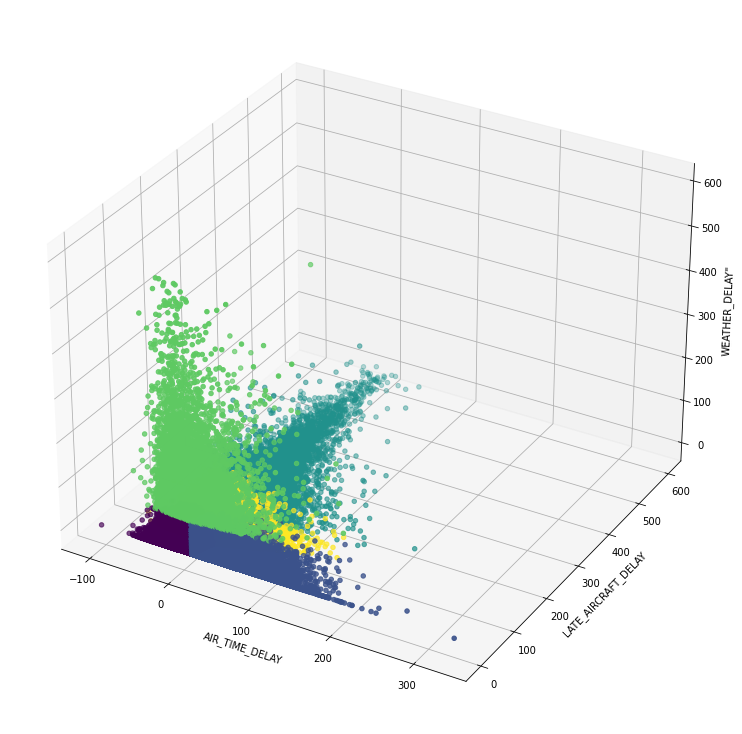

([<matplotlib.axis.XTick at 0x263f9d49790>,
 [Text(0, 0, 'Late aircraft delay'), Text(1, 0, 'Weather delay')])

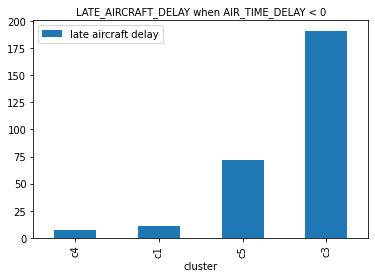

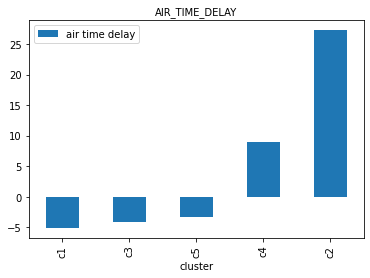

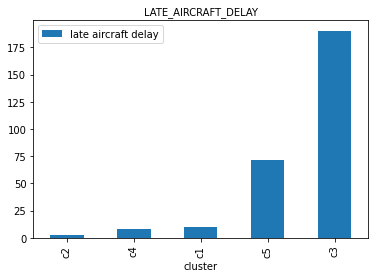

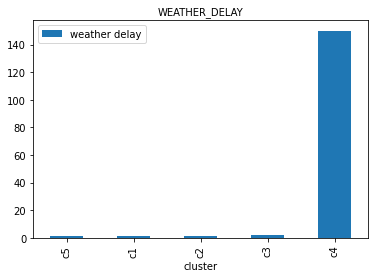

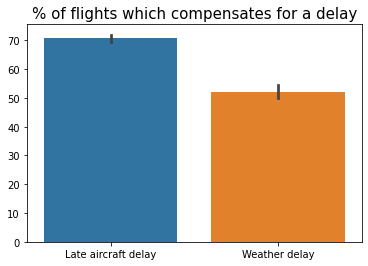

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
# We create a new plot and make it a 3D plot
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

# Labeling of axes
ax.set_xlabel('AIR_TIME_DELAY')
ax.set_ylabel('LATE_AIRCRAFT_DELAY')
ax.set_zlabel('WEATHER_DELAY"')

# Plot
ax.scatter(clustering_dataset["AIR_TIME_DELAY"], clustering_dataset["LATE_AIRCRAFT_DELAY"], clustering_dataset["WEATHER_DELAY"], c=clustering_dataset["clusterfordisplay"])
plt.show()

# We group by cluster and calculate the mean for late aircraft delay where air time delay <0. Further are some renaming operations to make the plot clearer.
mean_w_delays =clustering_dataset[clustering_dataset['AIR_TIME_DELAY'] < 0] \
    .groupby(by='cluster', as_index=True)\
        .mean()['LATE_AIRCRAFT_DELAY']\
            .rename(index={1:"C1.", 2:"C2.", 3:"C3", 4:"C4", 5:"C5" })\
                .to_frame()\
                    .rename(columns={"LATE_AIRCRAFT_DELAY":"late aircraft delay"})

mean_w_delays.sort_values("late aircraft delay").plot.bar()
plt.title('LATE_AIRCRAFT_DELAY when AIR_TIME_DELAY < 0', fontsize=10)

#We group by cluster and calculate the mean for air time delay.
mean_a_delays = clustering_dataset\
    .groupby(by='cluster', as_index=True)\
        .mean()["AIR_TIME_DELAY"]\
            .rename(index={1:"C1.", 2:"C2.", 3:"C3", 4:"C4", 5:"C5" })\
                .to_frame()\
                    .rename(columns={"AIR_TIME_DELAY":"air time delay"})

mean_a_delays.sort_values("air time delay").plot.bar()
plt.title('AIR_TIME_DELAY', fontsize=10)

#We group by cluster and calculate the mean for late aircraft delay.
mean_a_delays = clustering_dataset\
    .groupby(by='cluster', as_index=True)\
        .mean()["LATE_AIRCRAFT_DELAY"]\
            .rename(index={1:"C1.", 2:"C2.", 3:"C3", 4:"C4", 5:"C5" })\
                .to_frame()\
                    .rename(columns={"LATE_AIRCRAFT_DELAY":"late aircraft delay"})

mean_a_delays.sort_values("late aircraft delay").plot.bar()
plt.title('LATE_AIRCRAFT_DELAY', fontsize=10)

#We group by cluster and calculate the mean for weather delay.
mean_a_delays = clustering_dataset\
    .groupby(by='cluster', as_index=True)\
        .mean()["WEATHER_DELAY"]\
            .rename(index={1:"C1.", 2:"C2.", 3:"C3", 4:"C4", 5:"C5" })\
                .to_frame()\
                    .rename(columns={"WEATHER_DELAY":"weather delay"})

mean_a_delays.sort_values("weather delay").plot.bar()
plt.title('WEATHER_DELAY', fontsize=10)

#We want to plot the percentage of flights which compensates for a delay in the case of weather delay and late aircraft delay.
late_delay = clustering_dataset[clustering_dataset['AIR_TIME_DELAY'] < 0]['LATE_AIRCRAFT_DELAY'].value_counts()
weather_delay = clustering_dataset[clustering_dataset['AIR_TIME_DELAY'] < 0]['WEATHER_DELAY'].value_counts()

#We compute the percentage 
normalized_late_delay = (late_delay / clustering_dataset['LATE_AIRCRAFT_DELAY'].value_counts())*100
normalize_weather_delay = (weather_delay / clustering_dataset['WEATHER_DELAY'].value_counts())*100
flights= [normalized_late_delay, normalize_weather_delay]

#Plot
plt.figure()
sns.barplot(data=flights)
plt.title('% of flights which compensates for a delay', fontsize=15)
plt.xticks( [0, 1],['Late aircraft delay', 'Weather delay'])

    Your answer:
   As shown by the barplots LATE_AIRCRAFT_DELAY and WEATHER_DELAY, the C5 is the cluster with the lowest average delay in both types of the considered delay. However, it is the cluster with the highest average AIR_TIME_DELAY. This could mean that C5 refers to flights that have been delayed for reasons other than bad weather or late aircraft delay and have failed to compensate for it.
From the WEATHER_DELAY barplot we can observe that Cluster C3 includes the flights that have the highest average delay for bad weather.
Cluster C2 contains the highest average late_aircraft delay. The C4 cluster, on the other hand, is characterized by the lowest AIR_TIME_DELAY.
Comparing C2 and C3 we can observe, from the AIR_TIME_DELAY barplot, that C3 has a positive mean while C2 has a negative mean. This means that, between the two types of delay, of similar duration, it is more likely that LATE_AIRCRAFT_DELAYs will be compensated. From the last barplot '% of flights which compensates for a delay' we can in fact observe how 70% of flights that have been delayed at departure manage to compensate against 50% of flights that are delayed due to bad weather and compensate for it.
From the "LATE_AIRCRAFT_DELAY when AIR_TIME_DELAY <0" barplot we are viewing the late aircraft delays that have been compensated. We observe that cluster 2 is the one with the highest average late aircraft delay. This leads us to deduce that flights are able to compensate for a delay in departure up to 175 min on average.